# Реализация метода градиентного спуска

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
def function(x,y):
  return x**2 + x*y + y**2/6 - 6*math.log(x) - 5*math.log(y)

def deriv_x(x,y):
  return 2*x + y - 6/x

def deriv_y(x,y):
  return x + y/3 - 5/y

def derix_x_x(x,y):
  return 2 + 6/x**2

def derix_y_y(x,y):
  return 1/3 + 5/y**2

def derix_x_y(x,y):
  return 1

def grad(x, y):
    return np.array([deriv_x(x,y), deriv_y(x,y)])

def hesse(x, y):
    return np.array([[derix_x_x(x,y), derix_x_y(x,y)],
                     [derix_x_y(x,y),derix_y_y(x,y)]])

In [ ]:
#treshholds
delta_grad = 0.001
epsilon_f = 0.01
delta_x = 0.001
max_iters = 10

#first aproach
def gradient_descent_constant(x0, y0, step=0.06):
    x, y = x0, y0
    path = [(x, y)]
    f_vals = [function(x, y)]

    for k in range(max_iters):
        g = grad(x, y)
        x_new = x - step * g[0]
        y_new = y - step * g[1]
        f_new = function(x_new, y_new)

        if (np.linalg.norm(grad(x_new, y_new)) < delta_grad and abs(f_new - f_vals[-1]) < epsilon_f and np.linalg.norm([x_new - x, y_new - y]) < delta_x):
            path.append((x_new, y_new))
            f_vals.append(f_new)
            break

        x, y = x_new, y_new
        path.append((x, y))
        f_vals.append(f_new)

    return np.array(path), np.array(f_vals)

#second aproach
def gradient_descent_fastest(x0, y0):
    x, y = x0, y0
    path = [(x, y)]
    f_vals = [function(x, y)]

    for k in range(max_iters):
        g = grad(x, y)
        H = hesse(x, y)
        alpha = np.dot(g, g) / np.dot(g, H.dot(g))

        x_new = x - alpha * g[0]
        y_new = y - alpha * g[1]
        f_new = function(x_new, y_new)

        if (np.linalg.norm(grad(x_new, y_new)) < delta_grad and abs(f_new - f_vals[-1]) < epsilon_f and np.linalg.norm([x_new - x, y_new - y]) < delta_x):
            path.append((x_new, y_new))
            f_vals.append(f_new)
            break

        x, y = x_new, y_new
        path.append((x, y))
        f_vals.append(f_new)

    return np.array(path), np.array(f_vals)

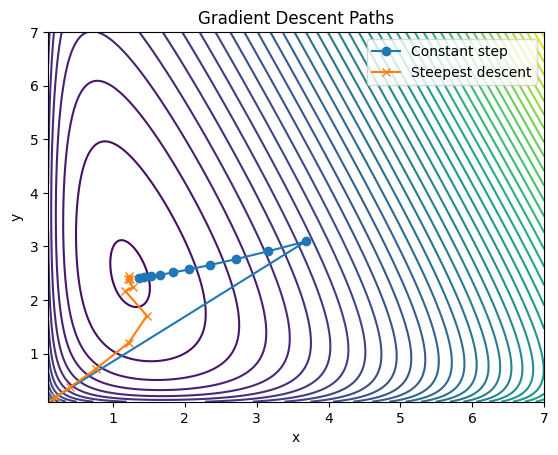

In [ ]:
#initial point
x0, y0 = 0.1, 0.1

#run
path_const, f_const = gradient_descent_constant(x0, y0)
path_step, f_step = gradient_descent_fastest(x0, y0)

#graph
x_vals = np.linspace(0.1, 7, 400)
y_vals = np.linspace(0.1, 7, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + X*Y + Y**2/6 - 6*np.log(X) - 5*np.log(Y)

plt.figure()
cs = plt.contour(X, Y, Z, levels=50)
plt.plot(path_const[:,0], path_const[:,1], marker='o', label='Constant step')
plt.plot(path_step[:,0], path_step[:,1], marker='x', label='Steepest descent')
plt.title('Gradient Descent Paths')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
#comparison

print("analytics")
print(f"x = {(3/2)**0.5}, y = {(6)**0.5} \n")

#grad const
print("grad const")
print(f"x = {path_const[-1][0]}, y = {path_const[-1][1]} \n")

#grad fastest
print("grad fastest")
print(f"x = {path_step[-1][0]}, y = {path_step[-1][1]} \n")

analytics
x = 1.224744871391589, y = 2.449489742783178 

grad const
x = 1.136899659048149, y = 2.9646125158075787 

grad fastest
x = 1.2197578306876238, y = 2.4380193886233408 



In [ ]:
print(path_const)
print("\n")
print(path_step)

[[0.1        0.1       ]
 [6.07       5.08666667]
 [4.44618012 4.40840731]
 [3.25105067 3.93026203]
 [2.39237005 3.60136621]
 [1.80455674 3.38091987]
 [1.43804503 3.23565561]
 [1.24410357 3.13852411]
 [1.16370541 3.06880683]
 [1.13967805 3.0130725 ]
 [1.13689966 2.96461252]]


[[0.1        0.1       ]
 [0.20637879 0.18885688]
 [0.40577204 0.37238477]
 [0.75937786 0.70764764]
 [1.22115784 1.2016192 ]
 [1.47295778 1.70531522]
 [1.17559651 2.16366839]
 [1.2798643  2.23697797]
 [1.20399655 2.38328078]
 [1.23648461 2.40010993]
 [1.21975783 2.43801939]]
